# Exercise 9

## Mashable news stories analysis

Predicting if a news story is going to be popular


In [126]:
import pandas as pd

url = 'https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/mashable.csv'
train_df = pd.read_csv(url, index_col=0)
train_df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [132]:
train_df.shape

(6000, 61)

In [133]:
X = train_df.drop(['url', 'Popular'], axis=1)
y = train_df['Popular']

In [134]:
y.mean()

0.5

In [135]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Exercise 9.1

Estimate a Decision Tree Classifier and a Logistic Regresion

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn import metrics

models = {'logreg': LogisticRegression (),
          'dt': DecisionTreeRegressor()}

In [138]:
for model in models.keys():
    models[model].fit(X_train, y_train)

y_pred = pd.DataFrame(index=y_test.index, columns=models.keys())
for model in models.keys():
    y_pred[model] = models[model].predict(X_test)
#y_pred.tail()

,dt,logreg
3077,1.0,0
5166,1.0,0
2227,1.0,1
5684,0.0,0
1937,1.0,0


In [139]:
print('Accuracy:')
for model in models.keys():   
    print(model,metrics.accuracy_score(y_pred[model], y_test))
print('\n')    
print('F1-Score:')
for model in models.keys():
    print(model,metrics.f1_score(y_pred[model], y_test))   

Accuracy:
('dt', 0.538)
('logreg', 0.62)


F1-Score:
('dt', 0.5419695968274949)
('logreg', 0.6030640668523677)


# Exercise 9.2

Estimate 300 bagged samples

Estimate the following set of classifiers:

* 100 Decision Trees where max_depth=None
* 100 Decision Trees where max_depth=2
* 100 Logistic Regressions

In [140]:
n_estimators = 300
# set a seed for reproducibility
np.random.seed(123)

n_samples = X_train.shape[0]

# create bootstrap samples (will be used to select rows from the DataFrame)
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]

In [141]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

np.random.seed(123) 
seeds = np.random.randint(1, 10000, size=n_estimators)

trees = {}
for i in range(100):
    # * 100 Decision Trees where max_depth=None
    trees[i] = DecisionTreeClassifier(max_depth=None, random_state=seeds[i])
    trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

    # * 100 Decision Trees where max_depth=2
for i in range(100,200):
    trees[i] = DecisionTreeClassifier(max_depth=2, random_state=seeds[i])
    trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
    
    # * 100 Logistic Regressions
for i in range(200,300):
    trees[i] = LogisticRegression(random_state=seeds[i])
    trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
    

In [176]:
# Predict  Tree
y_pred_df_Trees = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df_Trees.iloc[:, i] = trees[i].predict(X_test)

y_pred_df_Trees.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
1483,1,1,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2185,1,1,1,1,0,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
2520,1,0,0,0,1,0,1,1,0,0,...,1,1,1,1,1,1,1,1,1,1
3721,1,1,1,0,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3727,0,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Exercise 9.3

Ensemble using majority voting

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [177]:
y_pred = (y_pred_df_Trees.sum(axis=1) >= (n_estimators / 2)).astype(np.int)

from sklearn import metrics
metrics.f1_score(y_pred, y_test)


0.6262904335856848

In [178]:
metrics.accuracy_score(y_pred, y_test)

0.638

# Exercise 9.4

Estimate te probability as %models that predict positive

Modify the probability threshold and select the one that maximizes the F1-Score

In [179]:
res=[]
f1s=[]
for i in np.arange(0.1, 1, 0.05):
    y_pred_f = (y_pred_df_Trees.sum(axis=1) >= (n_estimators *i)).astype(np.int)
    res.append((i,metrics.f1_score(y_pred_f, y_test)))
    f1s.append(metrics.f1_score(y_pred_f, y_test))
res

[(0.1, 0.6985507246376812),
 (0.15000000000000002, 0.7022982362373064),
 (0.20000000000000004, 0.6783625730994153),
 (0.25000000000000006, 0.6735187424425635),
 (0.30000000000000004, 0.6683046683046683),
 (0.3500000000000001, 0.6645885286783042),
 (0.40000000000000013, 0.6602809706257983),
 (0.45000000000000007, 0.6490765171503959),
 (0.5000000000000001, 0.6248275862068966),
 (0.5500000000000002, 0.6057553956834532),
 (0.6000000000000002, 0.5936343449296817),
 (0.6500000000000001, 0.5854025583145221),
 (0.7000000000000002, 0.5747126436781609),
 (0.7500000000000002, 0.5616224648985959),
 (0.8000000000000002, 0.5372168284789645),
 (0.8500000000000002, 0.46402877697841727),
 (0.9000000000000002, 0.2671009771986971),
 (0.9500000000000003, 0.05115089514066496)]

Text(0,0.5,'F1S')

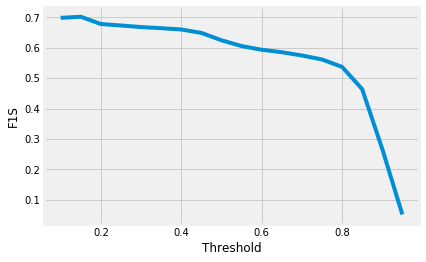

In [180]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(np.arange(0.1, 1, 0.05), f1s)
plt.xlabel('Threshold')
plt.ylabel('F1S')

In [181]:
print (max(f1s))

0.7022982362373064


# Exercise 9.5

Ensemble using weighted voting using the oob_error

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [150]:
samples_oob = []
# show the "out-of-bag" observations for each sample
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples)) - set(sample)))

In [151]:
# Estimate the oob error of each classifier
errors = np.zeros(n_estimators)

for i in range(n_estimators):
    y_pred_ = trees[i].predict(X_train.iloc[samples_oob[i]])
    errors[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)

Text(0.5,1,'OOB error of each tree')

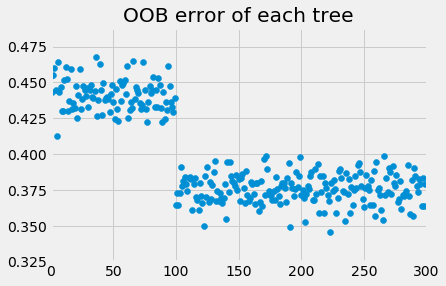

In [152]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.scatter(range(n_estimators), errors)
plt.xlim([0, n_estimators])
plt.title('OOB error of each tree')

In [153]:
alpha = (1 - errors) / (1 - errors).sum()

In [182]:
weighted_sum_1 = ((y_pred_df_Trees) * alpha).sum(axis=1)
#weighted_sum_1.head(20)

In [155]:
y_pred = (weighted_sum_1 >= 0.5).astype(np.int)

metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6271536871123363, 0.6393333333333333)

# Exercise 9.6

Estimate te probability of the weighted voting

Modify the probability threshold and select the one that maximizes the F1-Score

In [166]:
res=[]
f1s2=[]
for i in np.arange(0.1, 1, 0.05):
    y_pred = (weighted_sum_1>=i).astype(np.int)
    res.append((i,metrics.f1_score(y_pred, y_test)))
    f1s2.append(metrics.f1_score(y_pred, y_test))
res

[(0.1, 0.7002938295788443),
 (0.15000000000000002, 0.6997275204359672),
 (0.20000000000000004, 0.6780258519388954),
 (0.25000000000000006, 0.6723300970873787),
 (0.30000000000000004, 0.6674876847290641),
 (0.3500000000000001, 0.6654205607476635),
 (0.40000000000000013, 0.6611359285258457),
 (0.45000000000000007, 0.6482213438735177),
 (0.5000000000000001, 0.6271536871123363),
 (0.5500000000000002, 0.6031746031746031),
 (0.6000000000000002, 0.5942350332594236),
 (0.6500000000000001, 0.5840840840840841),
 (0.7000000000000002, 0.576893649579189),
 (0.7500000000000002, 0.5652173913043478),
 (0.8000000000000002, 0.5406275140788415),
 (0.8500000000000002, 0.49653979238754337),
 (0.9000000000000002, 0.29652996845425866),
 (0.9500000000000003, 0.08281053952321205)]

Text(0,0.5,'F1S')

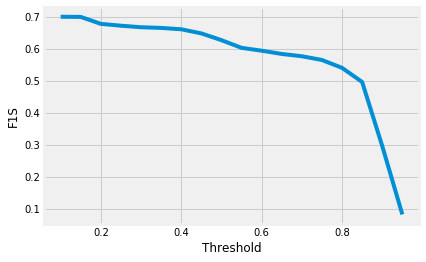

In [169]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(np.arange(0.1, 1, 0.05), f1s2)
plt.xlabel('Threshold')
plt.ylabel('F1S')

In [168]:
print (max(f1s2))

0.7002938295788443


# Exercise 9.7

Estimate a logistic regression using as input the estimated classifiers

Modify the probability threshold such that maximizes the F1-Score

In [172]:
X_train_New = pd.DataFrame(index=X_train.index, columns=list(range(n_estimators)))

for i in range(n_estimators):
    X_train_New[i] = trees[i].predict(X_train)
#X_train_New.tail()

In [173]:
from sklearn.linear_model import LogisticRegressionCV
logreg2 = LogisticRegressionCV(cv = 5 )
logreg2.fit(X_train_New, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [184]:
y_pred = logreg2.predict(y_pred_df_Trees)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6425755584756899, 0.6373333333333333)